<a href="https://colab.research.google.com/github/Bhaveshahluwalia/Data-Analytics-Project/blob/main/problem-set08/Problem_set_08_Exam_Project_CUS615.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is part the of **Dr. Christoforos Christoforou's** course materials. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials or any of their derivatives without the instructor's express written consent.

# Exam Project
**Professor**: Dr. Christoforos Christoforou

The objective of this project is to reproduce the data analysis method presented in the paper:

* **"Mining Big Data to Extract Patterns and Predict Real-Life Outcomes"**
by Michal Kosinski, Yilun Wang, Himabindu Lakkaraju, and Jure Leskovec.


You must implement the analysis using python code. This notebook provides you with the starting code to load the data and guides you through the requirement and each sub-task of the analysis. To complete this project you are expected to:

1. Carefully read the paper.
2. Refer the class lecture where this paper was discussed in detail.
3. Research various python libraries and utility functions needed to implement your analysis.
4. Complete all the challenges outlined in this notebook.



## Student Information 
Complete your information in the form provided below. This is visible in colab. 


In [60]:
#@title Strudent Information 
student_name = "Bhavesh Ahluwalia" #@param {type:"string"}
course_code = "CUS-615" #@param {type:"string"}


## Starter code - Configuring the analysis environment
The code cells below provide you a starting code to setup the environment for you to complete this project's tasks.

In particular, the code downloads the three dataset associated with this project and stores them in the folder `/content/sample_data/`. The data files from the paper comprise the `likes.csv` file, the `users.csv` file and the `users-likes.csv`; description of each data file is availabile in the paper.




In [61]:
#
# Run this sell to download the data for your analysis. 
#
!wget -O /content/sample_data/sample_dataset.zip https://osf.io/9m87k/download
!unzip /content/sample_data/sample_dataset.zip -d /content/sample_data/


--2021-05-10 22:44:51--  https://osf.io/9m87k/download
Resolving osf.io (osf.io)... 35.190.84.173
Connecting to osf.io (osf.io)|35.190.84.173|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://files.osf.io/v1/resources/fuqjg/providers/osfstorage/5e946850f1353503a3d52f24?action=download&direct&version=1 [following]
--2021-05-10 22:44:51--  https://files.osf.io/v1/resources/fuqjg/providers/osfstorage/5e946850f1353503a3d52f24?action=download&direct&version=1
Resolving files.osf.io (files.osf.io)... 35.186.214.196
Connecting to files.osf.io (files.osf.io)|35.186.214.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 314322145 (300M) [application/octet-stream]
Saving to: ‘/content/sample_data/sample_dataset.zip’

/content/sample_dat 100%[===================>] 299.76M  16.9MB/s    in 18s     

2021-05-10 22:45:10 (16.4 MB/s) - ‘/content/sample_data/sample_dataset.zip’ saved [314322145/314322145]

Archive:  /content/sample_data/sa

In [62]:
#
# Install additional package not available in colab.
#
%pip install factor_analyzer

In [63]:
#
# You will likely need the following python packages when implementing this project.
# Add any additional package as you deem necessary 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds, eigs
from factor_analyzer import Rotator

# Additional package you want to use:


## Challenge 1 : Load the data into dataframes
In this challenge you are expected to load the data from the raw files into the following variables:
-  `users` : should reference a dataframe with the data in the `users.csv` file
-  `likes` : should reference a dataframe with the data in the `likes.csv` file
-  `ul` : should reference a dataframe with the data in `users.csv` file

Then print the top 10 rows of reach dataframe.

In [124]:
#
# Your code goes here 
# 
users= pd.read_csv("/content/sample_data/users.csv") # Loading the data into dataframe for users
likes= pd.read_csv("/content/sample_data/likes.csv") # Loading the data into dataframe for users
ul= pd.read_csv("/content/sample_data/users-likes.csv") # Loading the data into dataframe for ul

In [125]:
#
# Answer summary cell: Print the top 10 row from each datafame. 
# 
users.head(10) # head of the users 

,userid,gender,age,political,ope,con,ext,agr,neu
0,54f34605aebd63f7680e37ffd299af79,0,33,0.0,1.26,1.65,1.17,-1.76,0.61
1,86399f8c44ba54224b2e60177ca89fa9,1,35,0.0,1.07,0.17,-0.14,1.49,0.30
2,84fab50f3c60d1fdc83aa91b5e584a78,1,36,0.0,0.89,1.28,0.86,1.07,0.99
3,f3b8fdaccce12ef6352bfad4d6052fe9,0,39,NaN,0.33,-1.01,-0.33,-0.68,0.92
4,8b06ea5e9cb87c61da387995450607f7,0,31,NaN,0.15,0.47,1.17,-1.01,-0.32
5,7a2ec9c1de4ec137367e66ad759ec848,0,38,NaN,1.26,0.76,-0.46,-1.76,-0.76
6,259f8f9cce95b214dc9924af48bcd6f0,1,36,NaN,1.44,-0.12,-0.21,0.99,0.18
7,ea3d6b771a87038cbc9e7da666f82b7a,0,58,NaN,0.70,-0.94,0.86,0.99,-0.32
8,e9552c9fe95d5cda02e2b55c05a943bc,0,37,NaN,1.63,0.32,0.98,1.49,-1.50
9,db85e9a0b1ab33ab7be878b9c236e7f2,1,33,0.0,0.70,0.54,-0.27,-0.26,0.92


In [126]:
likes.head(10) # head of the likes

,likeid,name
0,3c1636c878e6eb2acfd00c6b61086e38,REIGN by Paul Gibson
1,feca46ddb8ef04f86172ace0cb7e004c,Cupcake Wishes & Birthday Dreams
2,b65f46d64c688fe98bdbcf93a76a71fc,Yo también me rei de la caída de otro jejeje
3,9c5c8bb82d2cd46fbd7582f944fe370e,Abraham Joshua Heschel Day School- Alumni Network
4,2d82fa84ad79b085dc516dde154327a2,Kennesaw Farmer's Market
5,0a7a01c82143347fc4703faa4e7f415c,Karlsruher SC
6,8ed466215d9a6a4168120387d6e390b8,Intercessory Prayer
7,f82d6a5b5fbfd48bd293971f998d4da5,Nitti Development
8,d2c160d8e526a8cd38a73b3186a06fbf,Lakewood Organic Juices
9,5485abaac8afc3f3807a92515aca3f2a,Space Lieutenant Z Hippo Tomahawk


In [127]:
ul.head(10)  # head of the ul (which is userlikes)

,userid,likeid
0,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38
1,978ab8e90c4d6ad1a48ef5c973b62f4d,feca46ddb8ef04f86172ace0cb7e004c
2,85123b0e358907725cf19a2cb0ec3983,b65f46d64c688fe98bdbcf93a76a71fc
3,ce110562b3e2f7e5cad3775b32d9caa5,b65f46d64c688fe98bdbcf93a76a71fc
4,8188d20745471273fa69ba44a5b28473,b65f46d64c688fe98bdbcf93a76a71fc
5,e9c621f322640e5f3b3842d19b38aaa8,b65f46d64c688fe98bdbcf93a76a71fc
6,f0c99cfcdbda49dc424848666c6b31a9,b65f46d64c688fe98bdbcf93a76a71fc
7,7de7b4609c6b51d956d27050c958d885,b65f46d64c688fe98bdbcf93a76a71fc
8,05ce4ab49d90139ec1f7af9f0255c9c6,b65f46d64c688fe98bdbcf93a76a71fc
9,051caa763b05e64d4c8699078e942dfd,9c5c8bb82d2cd46fbd7582f944fe370e


In [128]:
#userid for making user_row
userid1= ul['userid'].to_frame() 
userid2= users['userid'].to_frame()
users_row= userid2.reset_index().set_index('userid').loc[userid1.userid, 'index'].values
users_row= [x+1 for x in users_row]
ul['users_row'] = users_row # adding new column in dataframe with name 'user_row'

In [129]:
ul

,userid,likeid,users_row
0,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38,59353
1,978ab8e90c4d6ad1a48ef5c973b62f4d,feca46ddb8ef04f86172ace0cb7e004c,36793
2,85123b0e358907725cf19a2cb0ec3983,b65f46d64c688fe98bdbcf93a76a71fc,30998
3,ce110562b3e2f7e5cad3775b32d9caa5,b65f46d64c688fe98bdbcf93a76a71fc,50637
4,8188d20745471273fa69ba44a5b28473,b65f46d64c688fe98bdbcf93a76a71fc,72224
...,...,...,...
10612321,264088faf4884d77e025a4ceda148b73,20458d0f521d4bd3a0903cf2113a43f3,10414
10612322,d498e43d700dbb0006b733aa912e49c7,20458d0f521d4bd3a0903cf2113a43f3,31290
10612323,76ac7130db7f6065c969402226b7053b,20458d0f521d4bd3a0903cf2113a43f3,44280
10612324,05dcd62425918392dc5d42f7550cbd9e,20458d0f521d4bd3a0903cf2113a43f3,47599


In [130]:
#likeid for making like_row
likeid1= ul['likeid'].to_frame()
likeid2= likes['likeid'].to_frame()
like_row= likeid2.reset_index().set_index('likeid').loc[likeid1.likeid, 'index'].values
like_row= [x+1 for x in like_row]
ul['like_row'] = like_row # adding new column in dataframe with name 'like_row'

In [131]:
ul

,userid,likeid,users_row,like_row
0,71bc7c0901488aec6d30f0add257e7c5,3c1636c878e6eb2acfd00c6b61086e38,59353,1
1,978ab8e90c4d6ad1a48ef5c973b62f4d,feca46ddb8ef04f86172ace0cb7e004c,36793,2
2,85123b0e358907725cf19a2cb0ec3983,b65f46d64c688fe98bdbcf93a76a71fc,30998,3
3,ce110562b3e2f7e5cad3775b32d9caa5,b65f46d64c688fe98bdbcf93a76a71fc,50637,3
4,8188d20745471273fa69ba44a5b28473,b65f46d64c688fe98bdbcf93a76a71fc,72224,3
...,...,...,...,...
10612321,264088faf4884d77e025a4ceda148b73,20458d0f521d4bd3a0903cf2113a43f3,10414,1580284
10612322,d498e43d700dbb0006b733aa912e49c7,20458d0f521d4bd3a0903cf2113a43f3,31290,1580284
10612323,76ac7130db7f6065c969402226b7053b,20458d0f521d4bd3a0903cf2113a43f3,44280,1580284
10612324,05dcd62425918392dc5d42f7550cbd9e,20458d0f521d4bd3a0903cf2113a43f3,47599,1580284


## Challenge 2: Create the sparse user-likes matrix 
Create a **sparse matrix** that stores the data for the user-likes associations as described in the paper. The name of the user-likes matrix must be `M`, to keep the naming convention used in the paper. It is important that to store the data in a sparse matrix; you might need to research the topic of using sparse matrices in python (i.e. look at the `scipy.sparse` package and the `csr_matrix` class). *Hint: For this challenge,  you might find  the `merge` method from `pandas` library useful*. 

Once you create the matrix print its shape on the answer summary cell.

In [132]:
#
# Your code goes here.
# 
rows= ul['users_row'] -1
cols= ul['like_row'] -1
data = ul.index

# library
from scipy.sparse import csr_matrix

###M = csr_matrix((data, (rows, cols)))
M= csr_matrix((data, (rows, cols)))

In [133]:
#
# Answer summary cell: Print the shapes of M.  
#
M.shape
# it contains 110,728 number of users and 1580284 number of unique likes 

(110728, 1580284)

## Challege 3: Trim the sparse user-likes matrix M.
The paper calls for the matrix `M` to be trimmed (i.e. to remove users which did not like a minimum number of posts and posts that did not receive a minimum number of likes). In this challenge, you are expected to implement the trimming preprocessing step as described in the paper. The resulting matrix must be a sparse matrix. *Hint: you might want to research to index slice sparse matrices in python*

#### Professor reply on Canvas
Assuming you have a csr_matrix M, and the indexes you would like to slice in variables row_idx, and col_idx, then the syntax for slicing the matrix would be something like.
M[row_idx,:][:,col_idx]

The first square bracket slices by rows and keeps all the columns; the second square bracket is applied on the resulting sliced matrix (from the previous operation) and it further slices it by columns. You can do this operation in two steps as well; for example, something like: 

M1 = M[row_idx,:]
M2= M1[:,col_idx]
 
Notice that for each square bracket pair, you need to specify both the rows and column indices (: means all indices in that dimension) 
Hint 1: Finally, in the case of the paper, this slicing need to be repeated multiple times until no rows or columns are below the threshold. 
Hint 2: Slicing the matrix M affects the ordering of the 'users' and 'likes' ordering...
Hope this helps

In [134]:
users.shape
#here is the original users with 110728 numbers

(110728, 9)

In [135]:
#document reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.getnnz.html
#getnnz:  https://stackoverflow.com/questions/31188141/scipy-sparse-matrix-remove-the-rows-whose-all-elements-are-zero/35905815
#
# Your code here. 
# 

M = M[M.getnnz(1)>=50] # for the row that is greater and equal to 50
M = M[:,M.getnnz(0)>=150]   # for the column that is greater and equal to 150

In [136]:
#while loop for Trimming the User-Like Matrix same idea as paper
while 100>99:
  i = M.shape[0]
  M = M[M.getnnz(1)>=50] # for the row that is greater and equal to 50
  M = M[:,M.getnnz(0)>=150] # for the column that is greater and equal to 150
  M = M[M.getnnz(1)>=50] # repeat untill it reach the threshold
  if M.shape[0] == i:
    break
  else:
    continue

In [137]:
# users deleted from M are removed from the users object: 
users = users[users.index.isin(M.indices)] # to check the usersmatch 

In [138]:
users.shape
# now, we see 8523 likes of the users

(8523, 9)

In [139]:
#
# Answer summary cell:  Print the shape of the matrix M after trimming. 
# 
M.shape
#After trimmed Matrix M now, it contains 19,742 users and 8523 likes 

(19742, 8523)

In [140]:
M

<19742x8523 sparse matrix of type '<class 'numpy.longlong'>'
	with 3817840 stored elements in Compressed Sparse Row format>

## Challenge 4:  Split the sparse matrix into a training and testing matrices
To build a prediction model the paper calls for separating the data matrix (i.e. the user-like matrix) into a training and testing matrices. As part of this challenge, you need to create a training matrix `M_train` that includes the preferences of 80% of the users, and a testing matrix `M_test` that include the preferences of the remaining 20% of the users in the dataset. Both matrices `M_train` and `M_test` must be stored as sparse matrices. User will be randomly assigned to the training or testing set.

Print the shapes of the `M_train` and `M_test` matrices.




In [141]:
#
# Your code here. 
#
from sklearn.model_selection import train_test_split

#spliting data for training and testing 
M_train, M_test = train_test_split(M,test_size = .20, train_size= .80 , random_state= 42)


In [142]:
#
# Answer summary cell: Print the shapes of M_train, M_test and M matrices.  
# 
 #shapes of M_train
M_train.shape
#After spliting we have 15793 users in Training (which is 70% of the data) and 8523 likes 

(15793, 8523)

In [143]:
 # shapes of M_train
 M_test.shape
#After spliting we have 3949 users in Testing (which is 20% of the data) and 8523 likes 

(3949, 8523)

In [144]:
 # shapes of M_test
 M.shape
#After trimmed Matrix M now, it contains 19,742 users and 8523 likes 

(19742, 8523)

## Challege 5 : Reduce the dimensionality of the M_train matrix using SVD

In this challenge, you must use singular value decomposition (SVD) to reduce the dimensionality of the training matrix `M_train`. Remember that `M_train` is encoded as a sparse matrix so you would need to use an appropriate implementation of the SVD for sparse matrices. Your output should be the matrices `U`, `S` and `Vt` that correspond to the left singular vectors, the singular values, and the right singular vectors, respectively. You must specify a parameter `k` that defines the number of reduced dimensions you want to keep.

Print the shapes of the `U`, `S` and `Vt` matrices and the value you selected for parameter `k`.



In [145]:
#
# Your code here. 
#

#LIBRARY
from scipy.sparse.linalg import svds, eigs

R = 5 
#the SVD is commonly written as a = U S V.H. the v returned by this function is V.H and u= U
U, s, Vt = svds(M_train.astype('float'),R)
#U, sigma, Vt =np.linalg.svd(M)

#Note: return V is actually V^T in the formula 
print("V^T = ")
print(np.round(Vt, decimals =2))

V^T = 
[[ 0.    0.    0.   ...  0.03  0.02  0.02]
 [-0.   -0.   -0.   ...  0.   -0.01  0.01]
 [ 0.    0.    0.   ... -0.01  0.01 -0.01]
 [ 0.   -0.   -0.   ...  0.01  0.03  0.01]
 [ 0.    0.    0.   ...  0.01  0.03  0.01]]


In [146]:
#
# Answer summary cell: Print the shapes of U, S and Vt; and the value you selected for parameter `k`.
# 

#dimensions of the resulting matrices
print(f"U.shape: {U.shape}\nsigma.shape:{s.shape}\nVt.shape: {Vt.shape}\nThe value selected for parameter k: 5 ")

U.shape: (15793, 5)
sigma.shape:(5,)
Vt.shape: (5, 8523)
The value selected for parameter k: 5 


In [147]:
s

array([1.00084894e+09, 1.15760836e+09, 1.29670752e+09, 2.24214366e+09,
       3.72552495e+09])

[1.00084894e+09 1.15760836e+09 1.29670752e+09 2.24214366e+09
 3.72552495e+09]


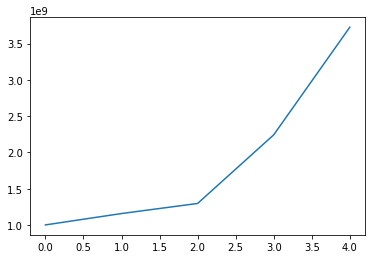

In [148]:
#check the singular Values
#note how many singular values capture most of the variance 
plt.plot(s)
s.shape
print(s)

## Challege 6 : Use the varimax algorithm to rotate the SVD dimensions. 
Use the varimax algorithm to rotate the SVD dimensions as described in the paper. A good python library that implements varimax algorithm is the `factor_analyzer` and its `Rotator` class (already installed in this notebook for your in the started cell above); i.e. using `rotator = Rotator(method='varimax')`. Store the varimax SVD into the matrices `U_rot` and `V_rot` respectively. *Hint: you can apply varimax of `Vt` to get `V_rot` and then multiply `M` by  `Vt_rot` to obtain the `U_rot` (as done in the paper); you might want to research hot to user the `Rotator` class*. 

Print the shapes of the matrices `U_rot` and `V_rot`.


In [32]:
#
# Your code here. 
#

#library
from factor_analyzer import Rotator

rotator= Rotator(method='varimax')
V_rot = rotator.fit_transform(Vt)

In [33]:
V_rot.shape

(5, 8523)

In [34]:
V_rot= V_rot.T

In [35]:
U_rot = M_train*V_rot

In [36]:
#
# Answer summary cell: Print the shapes of the matrices `U_rot` and `V_rot`
# 

#shape of matrices U_rot
U_rot.shape

(15793, 5)

In [37]:
#shape of matrices V_rot
V_rot.shape

(8523, 5)

## Challenge 7 : Train two predictive model to predict the political  affilication of users.
Build a predictive model that predicts the political affiliation of the users given the user's post preferences (as those are captured in the paper's dataset). To train your model you can use data from matrix `M_train` only. You are expected to use two different predictive models of your choice (i.e. Knn, SVM, Logistic Regression or some other model of your choice).

As part of this challenge you are expected to:
- Apply any necessary preprocessing to handle missing values.
- The models must be applied on the reduced-dimensional feature generated by your analysis above (i.e. use the singular rotated singular dimensions)
- Use cross-validation for model selection (i.e. to identify optimal parameters for your model, or any meta-parameters)
- Report training and cross-validation performance of the two models as well as the optimal parameters for your model identified by cross validation. 


**FIRST MODEL TRAINING: Use the cells below to train the predictive model using the first model you selected.**

In [ ]:
#
# Use this cell to train the first model you selected for challenge 7. 
# Add additional cells as needed below this cell.
#


In [149]:
#checking if there is any missing value in the users dataset
users.isnull().sum()

userid          0
gender          0
age             0
political    5300
ope             0
con             0
ext             0
agr             0
neu             0
dtype: int64

In [168]:
X_train = M_train * Vt.T  
X_test = M_test * Vt.T

In [169]:
X_train.shape

(3223, 5)

In [170]:
X_test.shape

(3223, 5)

In [154]:
users= users.dropna()

In [155]:
users.isnull().sum()

userid       0
gender       0
age          0
political    0
ope          0
con          0
ext          0
agr          0
neu          0
dtype: int64

In [156]:
users['political'].value_counts()

0.0    2335
1.0     888
Name: political, dtype: int64

In [158]:
M_train= M_train[users.index.isin(M_train.indices)]

In [160]:
M_train.shape

(3223, 8523)

In [159]:
M_test= M_test[users.index.isin(M_test.indices)] #removing index after removing nulls

In [161]:
M_test.shape

(3223, 8523)

In [108]:
users = users[users['political'].index.isin(M.indices)] #removing index after removing nulls

In [162]:
users

,userid,gender,age,political,ope,con,ext,agr,neu
0,54f34605aebd63f7680e37ffd299af79,0,33,0.0,1.26,1.65,1.17,-1.76,0.61
1,86399f8c44ba54224b2e60177ca89fa9,1,35,0.0,1.07,0.17,-0.14,1.49,0.30
2,84fab50f3c60d1fdc83aa91b5e584a78,1,36,0.0,0.89,1.28,0.86,1.07,0.99
9,db85e9a0b1ab33ab7be878b9c236e7f2,1,33,0.0,0.70,0.54,-0.27,-0.26,0.92
11,893533760a94f3539d9398a7ed9b01fa,0,35,0.0,1.16,-0.35,1.11,-0.09,-1.69
...,...,...,...,...,...,...,...,...,...
8506,3f79c587abd3cea60899d106c8914dbf,1,30,0.0,1.26,0.62,1.36,0.49,-0.88
8507,cd7cec9e87fb7ad5be8c70514b00f74c,0,30,1.0,-0.87,0.32,1.29,0.16,-1.32
8511,ed0deeed48d4cc2fe60fb028ae223ede,1,30,1.0,-1.15,-0.27,0.79,-0.39,0.18
8513,3835cdd43dbd19af0798b922456155f3,0,29,1.0,0.89,0.25,-0.52,0.32,0.80


In [172]:
X_train = M_train * Vt.T  
X_test = M_test * Vt.T

In [175]:
X_train, X_test = train_test_split(X_train,test_size = .20, train_size= .80, random_state=42)

In [165]:
y_train, y_test = train_test_split(users['political'],test_size = .20, train_size= .80, random_state=42)

In [166]:
y_train.shape

(2578,)

In [167]:
y_test.shape

(645,)

In [176]:
X_train.shape

(2578, 5)

In [177]:
X_test.shape

(645, 5)

In [185]:
from sklearn.model_selection import train_test_split #train_test_split methods allows us to use for splitting data arrays into two subsets: for training data and for testing data. 
from sklearn.neighbors import KNeighborsClassifier #KNeighborsClassifier model looks the nearest neighbours model.
from sklearn import metrics  # metrics methods allows us to calculate the confusion matrix, precision, recall 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn import metrics  # metrics methods allows us to calculate the confusion matrix, precision, recall 
from sklearn.svm import LinearSVC #Support vector machine-linear
from sklearn.svm import SVC ##Support vector machine-linear,poly,rgf..
from sklearn import svm# for using vector machine-linear,poly,rgf..
from sklearn.model_selection import GridSearchCV # for finding which parameter is the best

In [183]:
accuracy=[]
for i in range(1,10):
  #the classifier model- KNeighborsClassifier() classifier
  model = KNeighborsClassifier(n_neighbors=i)
  #train the model using the training sets
  model.fit(X_train,y_train)
  
  #predict output 
  y_pred= model.predict(X_test)
  y_true= y_test
  #Accuraccy
  acc= metrics.accuracy_score(y_true,y_pred)
  
  #to find the highest number with accuracy 
  accuracy.append(acc)
  #making arrays
  acc_array= np.array(accuracy)
    #below one is to see all the accuracy results 
  #print(" When n_neighbors= %.0f" %i,"then Accuracy is: %.4f" %acc)

print("when K neighbour parameter is",(np.argmax(acc_array)+1),"That gives best Accuracy score {:.4f}" .format(np.amax(acc_array)))
print(" ")

#Cross Validation Score
cv_accuracy=[]
for i in range(1,10): 
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)


  # Specify the corss validation parameters
  cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

  # Rum the corss-validation processing pipline 
  cv_acc = cross_val_score(estimator=model,
                          X=X_train,
                          y=y_train,
                          cv=cv,
                          n_jobs=-1)
  cv_accuracy.append(np.mean(cv_acc))
  #k_value.append(n_neighbors) #incase if i start my k_neighbour with 0
    #making arrays
  cv_array= np.array(cv_accuracy)
  # Report results of the accuracy. 

  #below one is to see all the accuracy results 
  #print("when K_neighbour parameter is %.0f" %i,"Cross-validation: {:.4f}".format(np.mean(cv_acc)))

print("The best Cross-validation score {:.4f}" .format(np.amax(cv_array)))

when K neighbour parameter is 4 That gives best Accuracy score 0.7163
 
The best Cross-validation score 0.7064


**FIRST MODEL ACCURACY REPORT: Use the cell below to report on the accuracy of your first model**


In [190]:
#
# Use this cell to report on the accuracy of the first model (i.e. training and cross validation performance)
# and model selection results. 

#KNN model
#Test accuracy results : 71.63%
print("Test accuracy results {:.4f}" .format(np.amax(acc_array)))
#The best Cross-validation score 0.7064
print("the best Cross-validation score: {:.4f}".format(np.amax(cv_array)))

Test accuracy results 0.7163
the best Cross-validation score: 0.7064


**SECOND MODEL TRAINING: Use the cells below to train the predictive model using the second model you selected.**

In [192]:
#
# Use this cell to train the second model you selected for challenge 7. 
# Add additional cells as needed below this cell.
#
rbf_accuracy = []
for i in range(1,5):
  model4= SVC(C=i,kernel="rbf",gamma='scale')
  model4.fit(X_train,y_train)
    #predict output 
  y_pred= model4.predict(X_test) 
  y_true= y_test

  #Accuraccy
  acc2= metrics.accuracy_score(y_true,y_pred)
  
  #to find the highest number with accuracy 
  rbf_accuracy.append(acc2)
  #making arrays
  acc_array= np.array(rbf_accuracy)
    #below one is to see all the accuracy results 
  #print(" When n_neighbors= %.0f" %i,"then Accuracy is: %.4f" %acc)

print("when parameter is",(np.argmax(acc_array)+1),"That gives best Accuracy score {:.4f}" .format(np.amax(acc_array)))
cv_accuracy=[]
for i in range(1,5): 
    # Specify the corss validation parameters
  cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    # Rum the corss-validation processing pipline 
  cv_acc = cross_val_score(estimator=model4,
                          X=X_train,
                          y=y_train,
                          cv=cv,
                          n_jobs=-1)
  cv_accuracy.append(np.mean(cv_acc))
    #making arrays
  cv_array= np.array(cv_accuracy)
    # Report results of the accuracy. 
print(" the best Cross-validation score: {:.4f}".format(np.amax(cv_array)))

when parameter is 1 That gives best Accuracy score 0.7426
 the best Cross-validation score: 0.7184


**SECOND MODEL ACCURACY REPORT: Use the cell below to report on the accuracy of your second model**

In [188]:
#
# Use this cell to report on the accuracy of the second model (i.e. training and cross validation performance)
# and model selection results.

#SVM model
#Test accuracy results : 74.26%
print("Test accuracy results {:.4f}" .format(np.amax(acc_array)))

#The best Cross-validation score 0.7184
print("the best Cross-validation score: {:.4f}".format(np.amax(cv_array)))

Test accuracy results 0.7426
the best Cross-validation score: 0.7184


## Challenge 8 Apply your model in the independent test set.
User the cells below to apply your two predictive models on the test dataset `M_test` and report testing accuracy for each model.

As part of this challenge you are expected to:
- Project each observation in the test dataset `M_test` onto the reduced-dimensional features space.
- Apply each on of your model to make predict each user's political preference (for users in the testing set only)
- Report testing accuracy on each of your models.
- Make an assessment as to which model is better and whether either of your models is overfitted or under-fitted.

In [ ]:
#
# Use this cell to comlete channlege 8; add more cells as necessary. 
#

In [194]:
M_test.shape

(3223, 8523)

In [201]:
accuracy=[]
for i in range(1,10):
  #the classifier model- KNeighborsClassifier() classifier
  model = KNeighborsClassifier(n_neighbors=i)
  #train the model using the training sets
  model.fit(X_train,y_train)
  
  #predict output 
  y_pred= model.predict(X_test)
  y_true= y_test
  #Accuraccy
  acc= metrics.accuracy_score(y_true,y_pred)
  
  #to find the highest number with accuracy 
  accuracy.append(acc)
  #making arrays
  acc_array= np.array(accuracy)
    #below one is to see all the accuracy results 
  #print(" When n_neighbors= %.0f" %i,"then Accuracy is: %.4f" %acc)

print("best Accuracy score {:.2f}" .format(np.amax(acc_array)))
print(" ")

#Cross Validation Score
cv_accuracy=[]
for i in range(1,10): 
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(X_train, y_train)


  # Specify the corss validation parameters
  cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

  # Rum the corss-validation processing pipline 
  cv_acc = cross_val_score(estimator=model,
                          X=X_train,
                          y=y_train,
                          cv=cv,
                          n_jobs=-1)
  cv_accuracy.append(np.mean(cv_acc))
  #k_value.append(n_neighbors) #incase if i start my k_neighbour with 0
    #making arrays
  cv_array= np.array(cv_accuracy)
  # Report results of the accuracy. 

  #below one is to see all the accuracy results 
  #print("when K_neighbour parameter is %.0f" %i,"Cross-validation: {:.4f}".format(np.mean(cv_acc)))

print("The best Cross-validation score {:.2f}" .format(np.amax(cv_array)))

best Accuracy score 0.72
 
The best Cross-validation score 0.71


In [202]:
#
# Use this cell to train the second model you selected for challenge 7. 
# Add additional cells as needed below this cell.
#
rbf_accuracy = []
for i in range(1,5):
  model4= SVC(C=i,kernel="rbf",gamma='scale')
  model4.fit(X_train,y_train)
    #predict output 
  y_pred= model4.predict(X_test) 
  y_true= y_test

  #Accuraccy
  acc2= metrics.accuracy_score(y_true,y_pred)
  
  #to find the highest number with accuracy 
  rbf_accuracy.append(acc2)
  #making arrays
  acc_array= np.array(rbf_accuracy)
    #below one is to see all the accuracy results 
  #print(" When n_neighbors= %.0f" %i,"then Accuracy is: %.4f" %acc)

print("best Accuracy score {:.2f}" .format(np.amax(acc_array)))
cv_accuracy=[]
for i in range(1,5): 
    # Specify the corss validation parameters
  cv = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

    # Rum the corss-validation processing pipline 
  cv_acc = cross_val_score(estimator=model4,
                          X=X_train,
                          y=y_train,
                          cv=cv,
                          n_jobs=-1)
  cv_accuracy.append(np.mean(cv_acc))
    #making arrays
  cv_array= np.array(cv_accuracy)
    # Report results of the accuracy. 
print(" the best Cross-validation score: {:.2f}".format(np.amax(cv_array)))

best Accuracy score 0.74
 the best Cross-validation score: 0.72


In [191]:
print("KNN Test accuracy results {:.2f}" .format(np.amax(acc_array)))

KNN Test accuracy results 0.72


In [193]:
print("SVM Test accuracy results {:.2f}" .format(np.amax(acc_array)))


SVM Test accuracy results 0.74


In [ ]:
# I believe SVM is better because it perform better than KNN anf has high accuracy results than KNN. 

# END OF EXAM/CODE


*Copyright Statement*: Copyright © 2020 Christoforou. The materials provided by the instructor of this course, including this notebook, are for the use of the students enrolled in the course. Materials are presented in an educational context for personal use and study and should not be shared, distributed, disseminated or sold in print — or digitally — outside the course without permission. You may not, nor may you knowingly allow others to reproduce or distribute lecture notes, course materials  as well as any of their derivatives without the instructor's express written consent.